#Observations

Below are my results from analyzing data on mouse tumor treatments. I believe that from this data there are three big take aways.

1. Capomulin and Ramicane are more sucessful at reducing tumor size than any of there competetors. This maybe result of greater research already haven been done for these drugs given that they also have the highest measurments taken

2. For the mouse b128, tumor treatment rapidly increased after the timepoint 25. This sugests that a certain amount of time is needed for sucessful treament. 

3. There is a strong correlation between tumor volume and mouse weight (.84 to be precise). This is clearly seen also with the points of the scatter plot gathered closly around linear regression line.

In [ ]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
mouse_df = pd.read_csv('./Resources/Mouse_metadata.csv')
result_df = pd.read_csv('./Resources/Study_results.csv')

In [47]:
mouse_results = pd.merge(result_df, mouse_df, on ="Mouse ID")
mouse_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [48]:
unique1 = mouse_results.loc[mouse_results.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
unique1

array(['g989'], dtype=object)

In [4]:
dropped_dupl = mouse_results[mouse_results["Mouse ID"] != "g989"]
dropped_dupl

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
#Generate a summary statistics table consisting of the mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each drug regimen.
drug_tumor = dropped_dupl[["Tumor Volume (mm3)", "Drug Regimen"]]
drug_df = drug_tumor.groupby(["Drug Regimen"])
mean_tumor = drug_df.mean()
mean_tumor = mean_tumor.rename(columns ={"Tumor Volume (mm3)": "Mean Tumor Volume (mm3)"})
mean_tumor

,Mean Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [49]:
median_tumor = drug_df.median()
median_tumor = median_tumor.rename(columns ={"Tumor Volume (mm3)": "Median Tumor Volume (mm3)"})
median_tumor

,Median Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [50]:
variance_tumor = drug_df.var()
variance_tumor = variance_tumor.rename(columns ={"Tumor Volume (mm3)": "Variance Tumor Volume (mm3)"})
variance_tumor

,Variance Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [51]:
std_tumor = drug_df.std()
std_tumor = std_tumor.rename(columns ={"Tumor Volume (mm3)": "Standard Deviation Tumor Volume (mm3)"})
std_tumor

,Standard Deviation Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [52]:
SEM_tumor = drug_df.sem()
SEM_tumor = SEM_tumor.rename(columns ={"Tumor Volume (mm3)": "SEM Tumor Volume (mm3)"})
SEM_tumor

,SEM Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [53]:
merged1 = pd.merge(std_tumor, SEM_tumor, on="Drug Regimen")
merged2 = pd.merge(median_tumor, merged1, on="Drug Regimen")
merged3 = pd.merge(mean_tumor, merged2, on= "Drug Regimen")
merged3

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


<IPython.core.display.Javascript object>


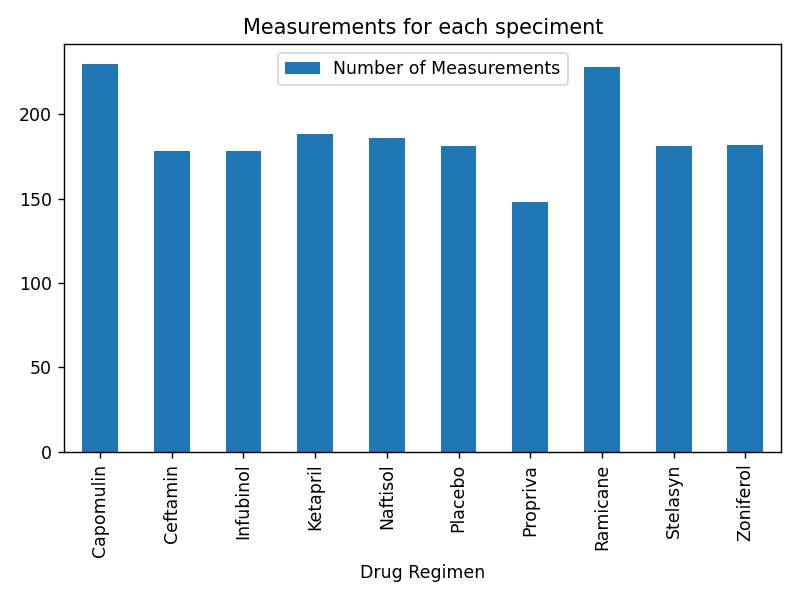

In [54]:
#Generate a bar plot using both Pandas’s DataFrame.plot() and Matplotlib’s pyplot that shows the total number of measurements taken for each treatment regimen throughout the course of the study.
ID_group = dropped_dupl.groupby(["Drug Regimen"])
num_measurements = ID_group.count()
num_measurements = num_measurements.rename(columns = {"Timepoint": "Number of Measurements"})
num_measurements1 = num_measurements[["Number of Measurements"]]
measurement_chart = num_measurements1.plot(kind="bar", title = "Measurements for each speciment")

plt.show()
plt.tight_layout()

In [55]:
num_measurements

,Mouse ID,Number of Measurements,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [56]:
num_measurements.reset_index(inplace=True)
num_measurements

,Drug Regimen,Mouse ID,Number of Measurements,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,Capomulin,230,230,230,230,230,230,230
1,Ceftamin,178,178,178,178,178,178,178
2,Infubinol,178,178,178,178,178,178,178
3,Ketapril,188,188,188,188,188,188,188
4,Naftisol,186,186,186,186,186,186,186
5,Placebo,181,181,181,181,181,181,181
6,Propriva,148,148,148,148,148,148,148
7,Ramicane,228,228,228,228,228,228,228
8,Stelasyn,181,181,181,181,181,181,181
9,Zoniferol,182,182,182,182,182,182,182


<IPython.core.display.Javascript object>


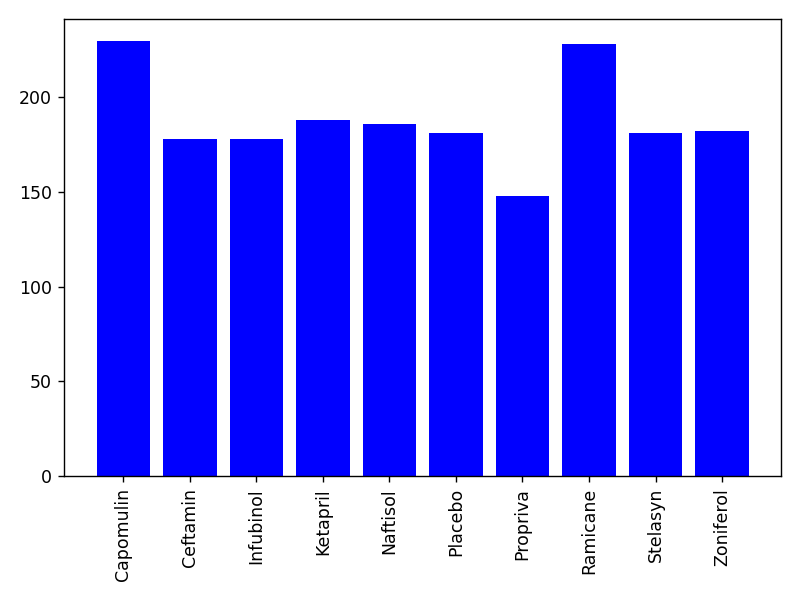

In [57]:
%matplotlib notebook
drugs = num_measurements.iloc[:, 0]
num_mesur = num_measurements.iloc[:, 7]

plt.bar(drugs, num_mesur, color="b", align="center")
tick_locations = [value for value in drugs]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.tight_layout()


In [58]:
#Generate a pie plot using both Pandas’s DataFrame.plot() and Matplotlib’s pyplot that shows the distribution of female or male mice in the study.
%matplotlib notebook
gender_mouse = mouse_results.groupby(["Sex", "Mouse ID"])
gender = gender_mouse.count()
gender_count = gender.groupby(["Sex"]) 
counted = gender_count.count()
counted = counted[["Timepoint"]]
counted = counted.rename(columns = {"Timepoint": "Number of Mice"})
counted.reset_index ()


,Sex,Number of Mice
0,Female,124
1,Male,125


<IPython.core.display.Javascript object>


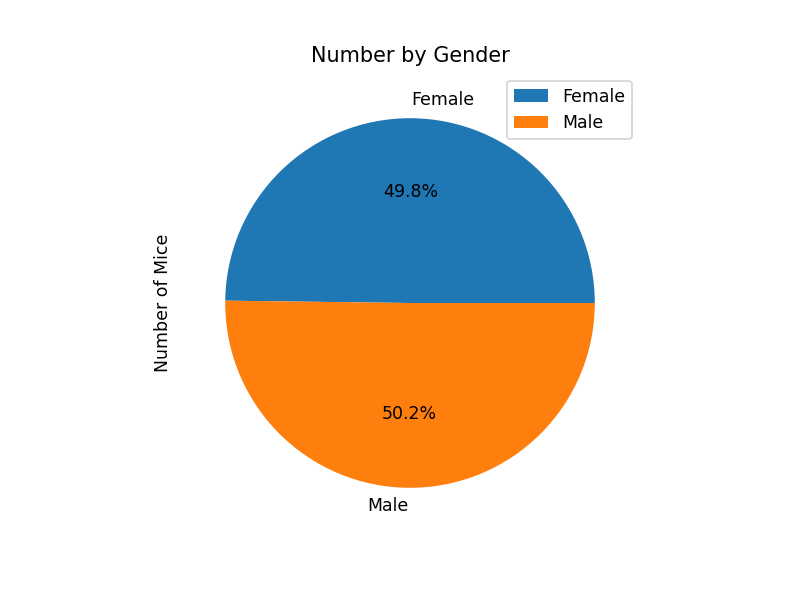

In [59]:
counted_pie = counted.plot(kind = "pie", y="Number of Mice", autopct='%1.1f%%', title= "Number by Gender")
plt.show()

<IPython.core.display.Javascript object>


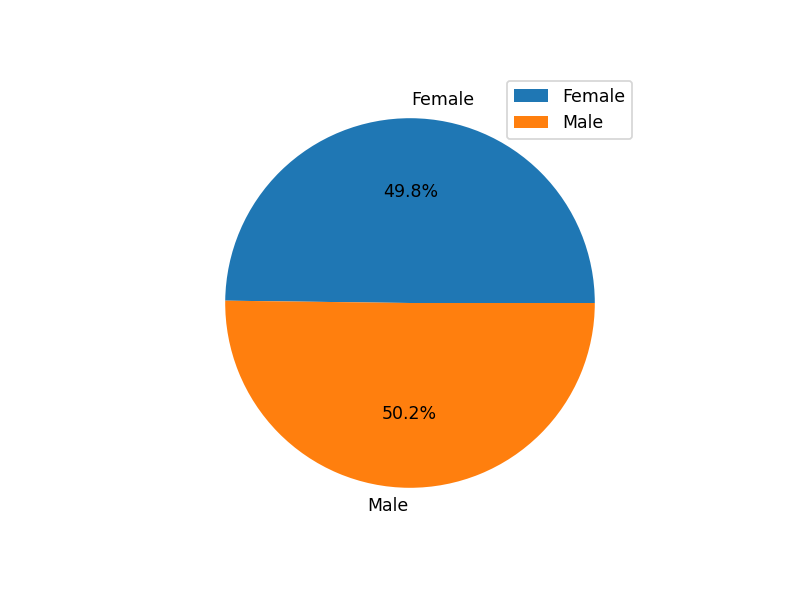

In [60]:
%matplotlib notebook
sex=["Female", "Male"]
number = counted.iloc[:, 0]
explode = [0, 0]
chart2 = plt.pie(number, explode=explode, labels=sex, autopct="%1.1f%%", shadow=False, startangle=0)
plt.legend(loc='upper right')
plt.show()

In [61]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin.
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

Capomulin = dropped_dupl.loc[dropped_dupl["Drug Regimen"]== "Capomulin",:]
Ramicane = dropped_dupl.loc[dropped_dupl["Drug Regimen"]== "Ramicane", :]
Infubinol = dropped_dupl.loc[dropped_dupl["Drug Regimen"]== "Infubinol",:]
Ceftamin = dropped_dupl.loc[dropped_dupl["Drug Regimen"]== "Ceftamin",:]

In [19]:
#capomulin
final_capo = Capomulin.groupby(["Mouse ID"])["Timepoint"].max()
capo_sum = pd.DataFrame(final_capo)
capo_merge = pd.merge(capo_sum, dropped_dupl, on=("Mouse ID","Timepoint"),how="left")
capo_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [62]:
capo_tumor = capo_merge["Tumor Volume (mm3)"]
quartiles = capo_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin final tumor size is: {lowerq}")
print(f"The upper quartile of Capomulin final tumor size is: {upperq}")
print(f"The interquartile range of Capomulin final tumor size is: {iqr}")
print(f"The the median of Capomulin final tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are outliers.")
print(f"Values above {upper_bound} are outliers.")

The lower quartile of Capomulin final tumor size is: 32.37735684
The upper quartile of Capomulin final tumor size is: 40.1592203
The interquartile range of Capomulin final tumor size is: 7.781863460000004
The the median of Capomulin final tumor size is: 38.1251644 
Values below 20.70456164999999 are outliers.
Values above 51.83201549 are outliers.


In [63]:
#ramicane
final_ram = Ramicane.groupby(["Mouse ID"])["Timepoint"].max()
ram_sum = pd.DataFrame(final_ram)
ram_merge = pd.merge(ram_sum, dropped_dupl, on=("Mouse ID","Timepoint"),how="left")
ram_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20
5,c758,45,33.397653,1,Ramicane,Male,9,17
6,d251,45,37.311236,2,Ramicane,Female,8,19
7,e662,45,40.659006,2,Ramicane,Male,8,24
8,g791,45,29.128472,1,Ramicane,Male,11,16
9,i177,45,33.562402,3,Ramicane,Male,10,18


In [64]:
ram_tumor = ram_merge["Tumor Volume (mm3)"]
quartiles = ram_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin final tumor size is: {lowerq}")
print(f"The upper quartile of Capomulin final tumor size is: {upperq}")
print(f"The interquartile range of Capomulin final tumor size is: {iqr}")
print(f"The the median of Capomulin final tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are outliers.")
print(f"Values above {upper_bound} are outliers.")

The lower quartile of Capomulin final tumor size is: 31.56046955
The upper quartile of Capomulin final tumor size is: 40.65900627
The interquartile range of Capomulin final tumor size is: 9.098536719999998
The the median of Capomulin final tumor size is: 36.56165229 
Values below 17.912664470000003 are outliers.
Values above 54.30681135 are outliers.


In [66]:
#infubinol
final_infu = Infubinol.groupby(["Mouse ID"])["Timepoint"].max()
infu_sum = pd.DataFrame(final_infu)
infu_merge = pd.merge(infu_sum, dropped_dupl, on=("Mouse ID","Timepoint"),how="left")
infu_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28
5,c326,5,36.321346,0,Infubinol,Female,18,25
6,c895,30,60.969711,2,Infubinol,Female,7,29
7,e476,45,62.435404,1,Infubinol,Male,23,26
8,f345,45,60.918767,1,Infubinol,Male,23,26
9,i386,40,67.289621,4,Infubinol,Female,23,29


In [67]:
infu_tumor =infu_merge["Tumor Volume (mm3)"]
quartiles = infu_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin final tumor size is: {lowerq}")
print(f"The upper quartile of Capomulin final tumor size is: {upperq}")
print(f"The interquartile range of Capomulin final tumor size is: {iqr}")
print(f"The the median of Capomulin final tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are outliers.")
print(f"Values above {upper_bound} are outliers.")

The lower quartile of Capomulin final tumor size is: 54.04860769
The upper quartile of Capomulin final tumor size is: 65.52574285
The interquartile range of Capomulin final tumor size is: 11.477135160000003
The the median of Capomulin final tumor size is: 60.16518046 
Values below 36.83290494999999 are outliers.
Values above 82.74144559000001 are outliers.


In [68]:
# ceftamin
final_cefta = Ceftamin.groupby(["Mouse ID"])["Timepoint"].max()
cefta_sum = pd.DataFrame(final_cefta)
cefta_merge = pd.merge(cefta_sum, dropped_dupl, on=("Mouse ID","Timepoint"),how="left")
cefta_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25
5,h531,5,47.784682,0,Ceftamin,Male,5,27
6,j296,45,61.849023,3,Ceftamin,Female,24,30
7,k210,45,68.923185,3,Ceftamin,Male,15,28
8,l471,45,67.748662,1,Ceftamin,Female,7,28
9,l490,30,57.918381,3,Ceftamin,Male,24,26


In [69]:
cefta_tumor =cefta_merge["Tumor Volume (mm3)"]
quartiles = cefta_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin final tumor size is: {lowerq}")
print(f"The upper quartile of Capomulin final tumor size is: {upperq}")
print(f"The interquartile range of Capomulin final tumor size is: {iqr}")
print(f"The the median of Capomulin final tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} are outliers.")
print(f"Values above {upper_bound} are outliers.")

The lower quartile of Capomulin final tumor size is: 48.72207785
The upper quartile of Capomulin final tumor size is: 64.29983003
The interquartile range of Capomulin final tumor size is: 15.577752179999997
The the median of Capomulin final tumor size is: 59.85195552 
Values below 25.355449580000002 are outliers.
Values above 87.66645829999999 are outliers.


<IPython.core.display.Javascript object>


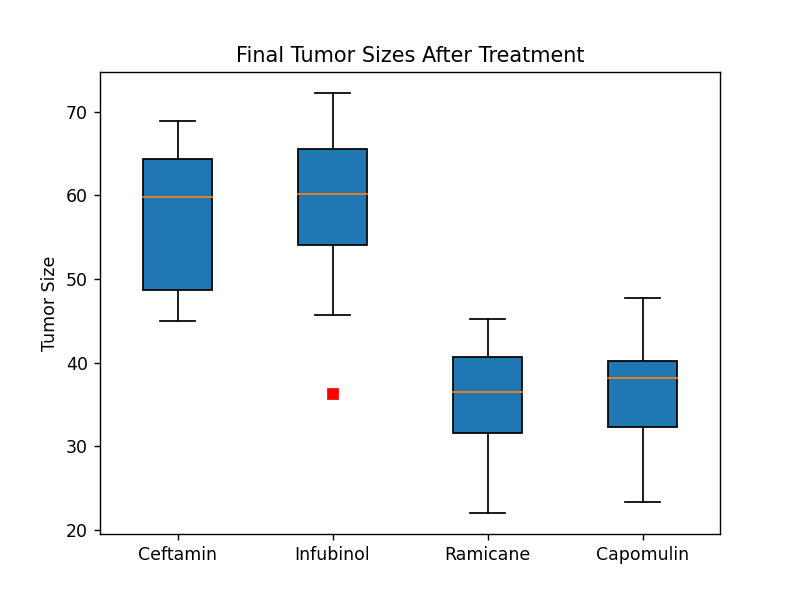

In [70]:
%matplotlib notebook
#Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.
to_plot = [cefta_tumor, infu_tumor, ram_tumor, capo_tumor]
drug_reg= ['Ceftamin','Infubinol', 'Ramicane', 'Capomulin']

fig1, ax1= plt.subplots()
ax1.set_title('Final Tumor Sizes After Treatment')
ax1.set_ylabel('Tumor Size')
ax1.boxplot(to_plot, 0, 'rs', labels=drug_reg, patch_artist=True)
plt.show()

<IPython.core.display.Javascript object>


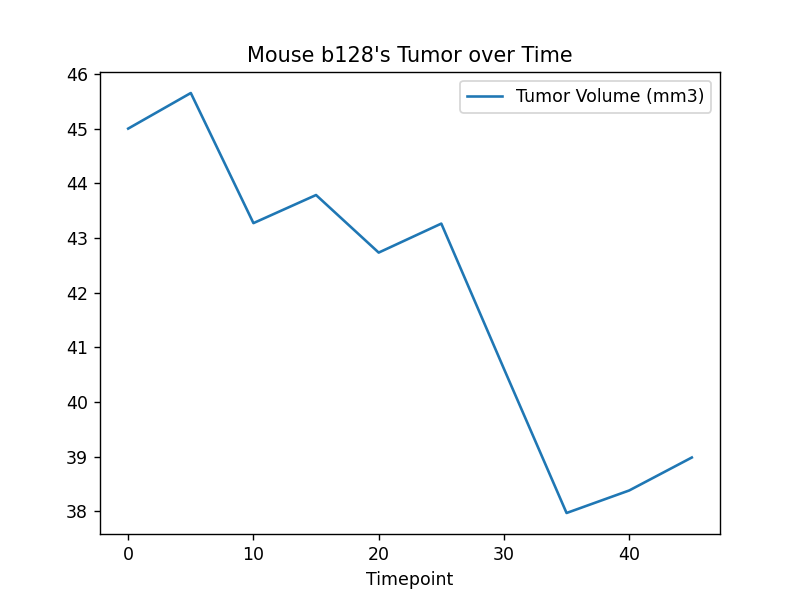

<AxesSubplot:title={'center':"Mouse b128's Tumor over Time"}, xlabel='Timepoint'>

In [71]:
%matplotlib notebook
#Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.
b128 = dropped_dupl.loc[dropped_dupl["Mouse ID"]=="b128", :] 
b128 = b128[["Timepoint", "Tumor Volume (mm3)"]]
b128.plot(kind= "line", x = "Timepoint", title = "Mouse b128's Tumor over Time")

<IPython.core.display.Javascript object>


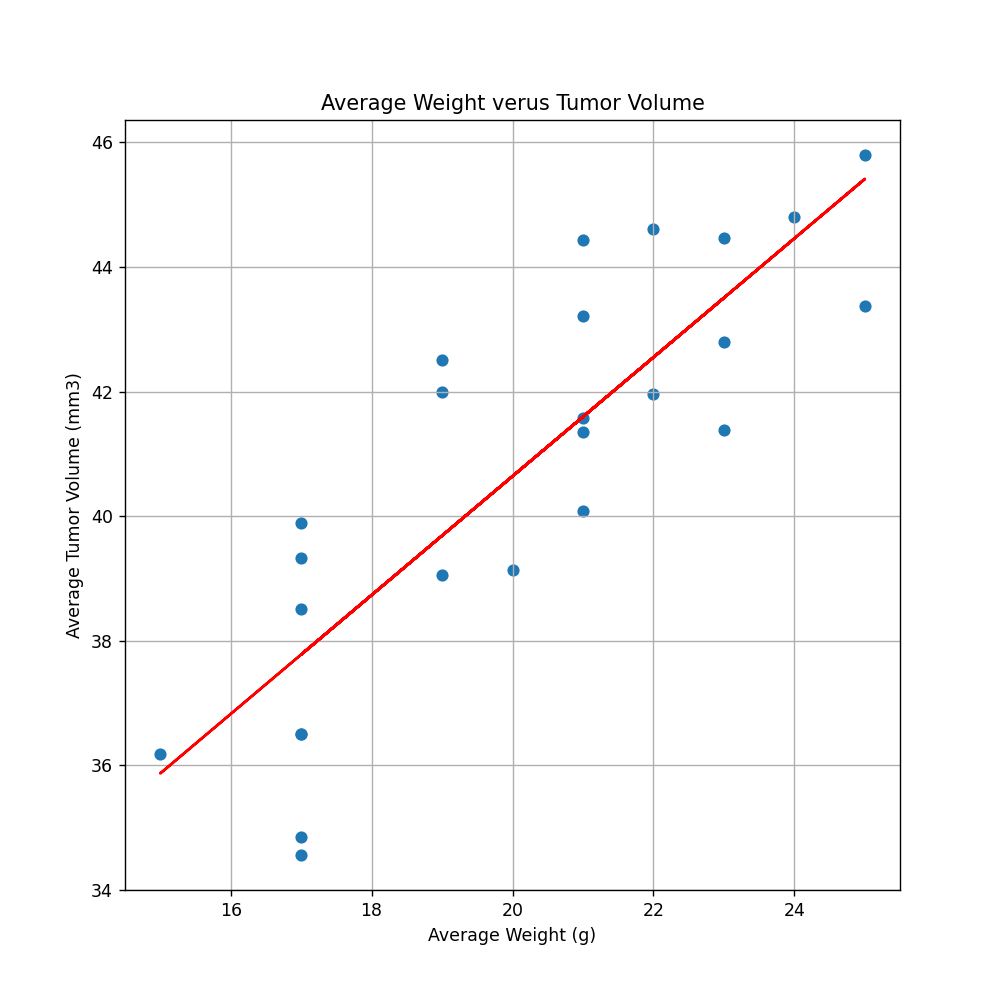

<AxesSubplot:title={'center':'Average Weight verus Tumor Volume'}, xlabel='Average Weight (g)', ylabel='Average Tumor Volume (mm3)'>

In [72]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
drugs = dropped_dupl.loc[dropped_dupl["Drug Regimen"] == "Capomulin"]
weight_tumor = drugs.groupby(["Mouse ID"])
mean_tumor = weight_tumor.mean()
mean_tumor = mean_tumor.rename(columns={"Weight (g)": "Average Weight (g)", "Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
mean_tumor.plot(kind="scatter", x="Average Weight (g)", y="Average Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Average Weight verus Tumor Volume")



In [73]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.
weight_a = mean_tumor.iloc[:, 4]
tumor_a = mean_tumor.iloc[:, 1]
correlation = st.pearsonr(weight_a, tumor_a)
print(f"The correlation between weight and tumor size is {round(correlation[0],2)}")

x_values = mean_tumor['Average Weight (g)']
y_values = mean_tumor['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show

The correlation between weight and tumor size is 0.84


<function matplotlib.pyplot.show(block=None)>